In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.applications import VGG16

Using TensorFlow backend.


In [3]:
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
train_dir = '/dataset/dataset-resized-train'
validation_dir = '/dataset/dataset-resized-test'

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
 
#train_features = np.zeros(shape=(nTrain, 7, 7, 512))
#train_labels = np.zeros(shape=(nTrain,6))
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 2013 images belonging to 6 classes.


In [27]:
nTrain = 2013

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,6))

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break
        
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

MemoryError: Unable to allocate 7.53 GiB for an array with shape (40260, 7, 7, 512) and data type float64

In [23]:
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 514 images belonging to 6 classes.


In [24]:
nVal = 514

validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,6))

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

In [25]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 2013 samples, validate on 514 samples
Epoch 1/20
2013/2013 [==============================] - 2s 1ms/step - loss: 1.6331 - acc: 0.4153 - val_loss: 1.1366 - val_acc: 0.5195
Epoch 2/20
2013/2013 [==============================] - 2s 1ms/step - loss: 1.0578 - acc: 0.5907 - val_loss: 1.1831 - val_acc: 0.5623
Epoch 3/20
2013/2013 [==============================] - 2s 1ms/step - loss: 0.8725 - acc: 0.6622 - val_loss: 0.8719 - val_acc: 0.6693
Epoch 4/20
2013/2013 [==============================] - 2s 1ms/step - loss: 0.7228 - acc: 0.7303 - val_loss: 0.8775 - val_acc: 0.6965
Epoch 5/20
2013/2013 [==============================] - 2s 1ms/step - loss: 0.6186 - acc: 0.7615 - val_loss: 0.8615 - val_acc: 0.7179
Epoch 6/20
2013/2013 [==============================] - 2s 1ms/step - loss: 0.5554 - acc: 0.7869 - val_loss: 0.8382 - val_acc: 0.7082
Epoch 7/20
2013/2013 [==============================] - 2s 1ms/step - loss: 0.4554 - acc: 0.8371 - val_loss: 0.8433 - val_acc: 0.7257
Epoch 8/20
2013

In [14]:
fnames = validation_generator.filenames

ground_truth = validation_generator.classes

label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

In [15]:
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features)

In [16]:
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 128/514


Original label:cardboard\cardboard142.jpg, Prediction :paper, confidence : 0.963


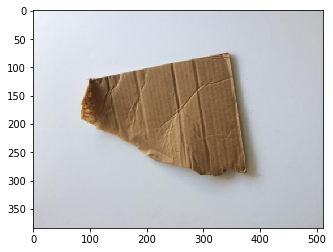

Original label:cardboard\cardboard150.jpg, Prediction :plastic, confidence : 0.822


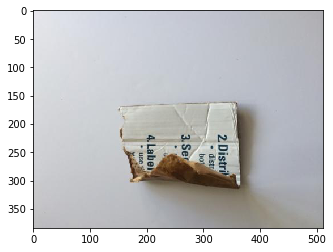

Original label:cardboard\cardboard151.jpg, Prediction :plastic, confidence : 0.839


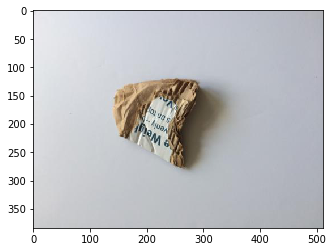

Original label:cardboard\cardboard166.jpg, Prediction :paper, confidence : 0.949


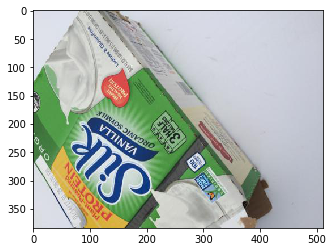

Original label:cardboard\cardboard171.jpg, Prediction :trash, confidence : 0.716


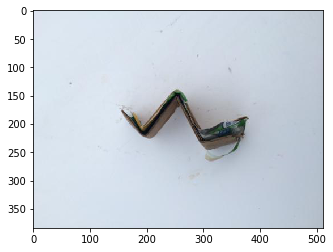

Original label:cardboard\cardboard189.jpg, Prediction :paper, confidence : 0.977


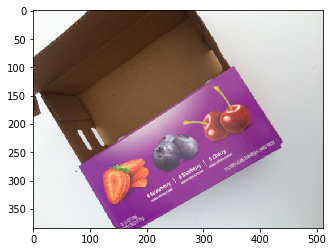

Original label:cardboard\cardboard254.jpg, Prediction :paper, confidence : 1.000


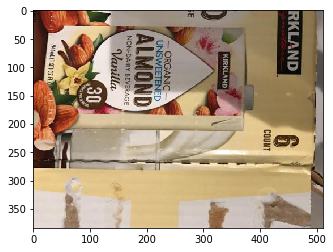

Original label:cardboard\cardboard294.jpg, Prediction :paper, confidence : 0.475


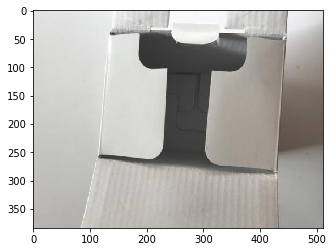

Original label:cardboard\cardboard299.jpg, Prediction :paper, confidence : 0.696


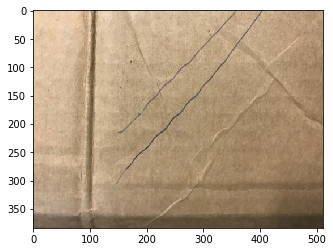

Original label:cardboard\cardboard309.jpg, Prediction :paper, confidence : 0.544


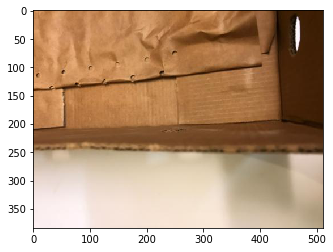

Original label:cardboard\cardboard385.jpg, Prediction :paper, confidence : 0.617


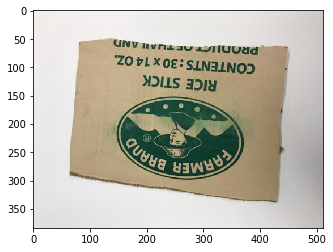

Original label:cardboard\cardboard7.jpg, Prediction :plastic, confidence : 0.844


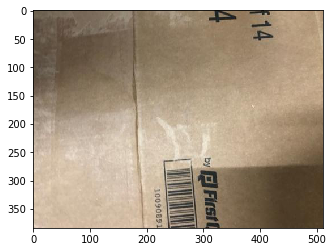

Original label:glass\glass100.jpg, Prediction :metal, confidence : 0.645


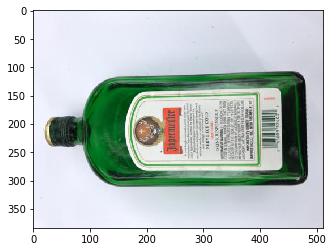

Original label:glass\glass109.jpg, Prediction :plastic, confidence : 0.988


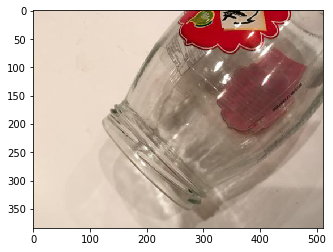

Original label:glass\glass116.jpg, Prediction :plastic, confidence : 0.951


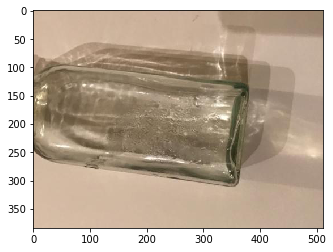

Original label:glass\glass122.jpg, Prediction :cardboard, confidence : 0.969


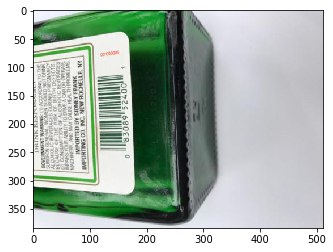

Original label:glass\glass134.jpg, Prediction :plastic, confidence : 0.618


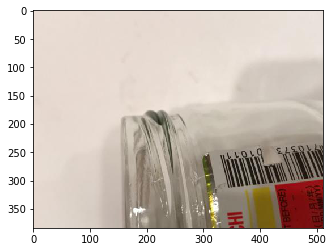

Original label:glass\glass155.jpg, Prediction :plastic, confidence : 0.998


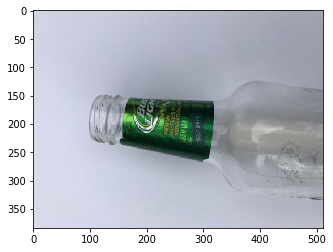

Original label:glass\glass16.jpg, Prediction :plastic, confidence : 0.725


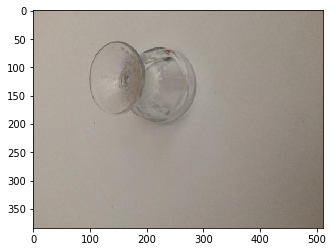

Original label:glass\glass170.jpg, Prediction :metal, confidence : 0.890


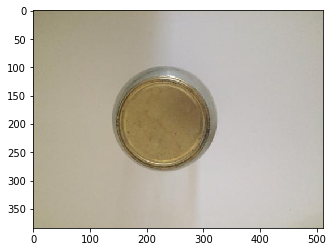

Original label:glass\glass183.jpg, Prediction :plastic, confidence : 0.787


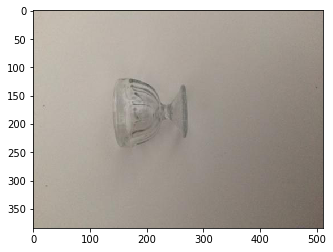

Original label:glass\glass190.jpg, Prediction :metal, confidence : 0.535


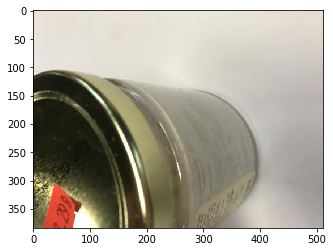

Original label:glass\glass194.jpg, Prediction :plastic, confidence : 0.560


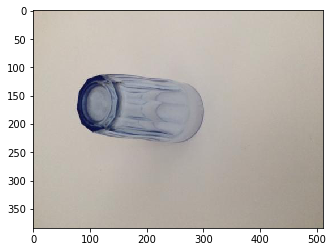

Original label:glass\glass199.jpg, Prediction :metal, confidence : 0.980


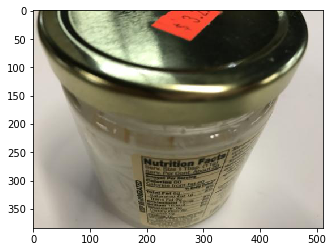

Original label:glass\glass211.jpg, Prediction :plastic, confidence : 0.679


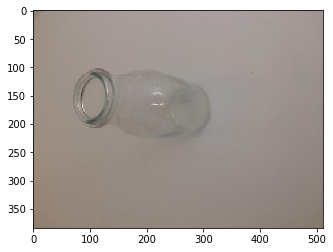

Original label:glass\glass214.jpg, Prediction :plastic, confidence : 0.936


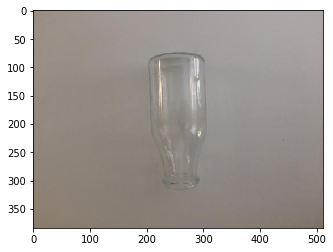

Original label:glass\glass215.jpg, Prediction :trash, confidence : 1.000


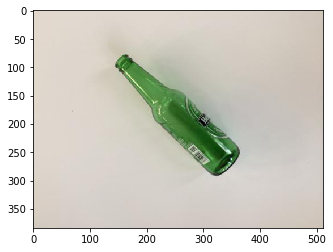

Original label:glass\glass221.jpg, Prediction :plastic, confidence : 0.999


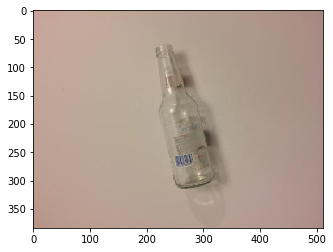

Original label:glass\glass234.jpg, Prediction :plastic, confidence : 0.742


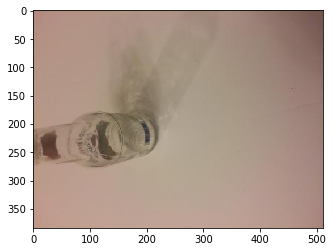

Original label:glass\glass241.jpg, Prediction :plastic, confidence : 0.757


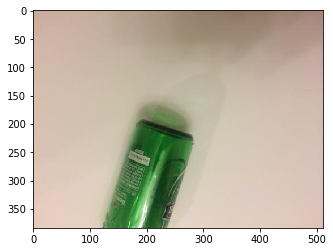

Original label:glass\glass256.jpg, Prediction :plastic, confidence : 0.845


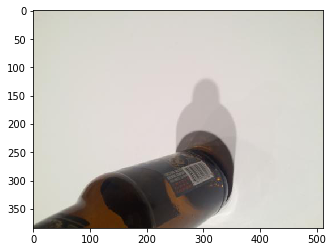

Original label:glass\glass265.jpg, Prediction :plastic, confidence : 0.989


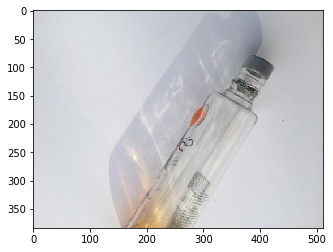

Original label:glass\glass266.jpg, Prediction :plastic, confidence : 0.992


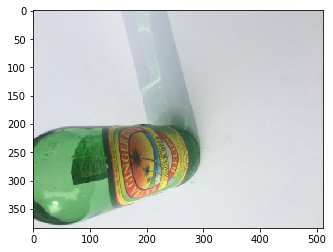

Original label:glass\glass267.jpg, Prediction :plastic, confidence : 0.977


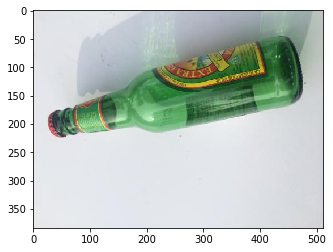

Original label:glass\glass28.jpg, Prediction :plastic, confidence : 0.814


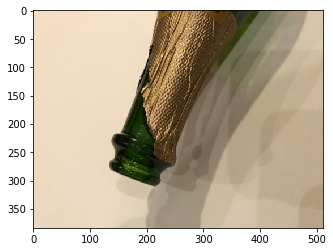

Original label:glass\glass303.jpg, Prediction :metal, confidence : 0.785


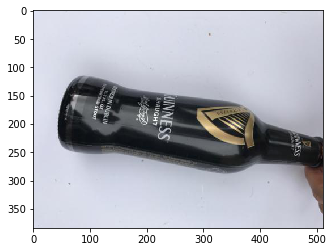

Original label:glass\glass312.jpg, Prediction :plastic, confidence : 0.657


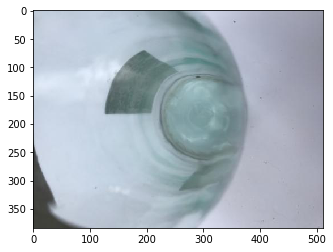

Original label:glass\glass32.jpg, Prediction :plastic, confidence : 0.996


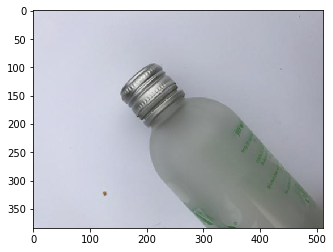

Original label:glass\glass334.jpg, Prediction :cardboard, confidence : 0.591


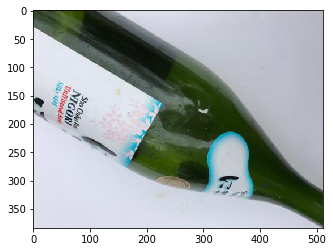

Original label:glass\glass337.jpg, Prediction :plastic, confidence : 0.993


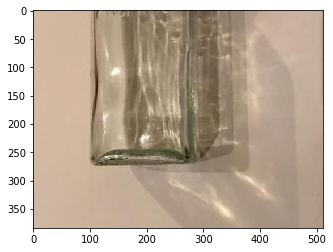

Original label:glass\glass340.jpg, Prediction :plastic, confidence : 0.939


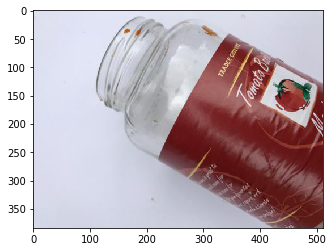

Original label:glass\glass347.jpg, Prediction :plastic, confidence : 0.985


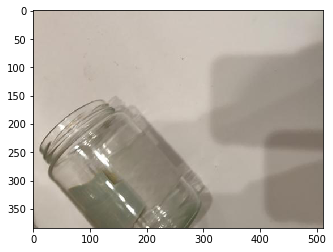

Original label:glass\glass348.jpg, Prediction :metal, confidence : 0.594


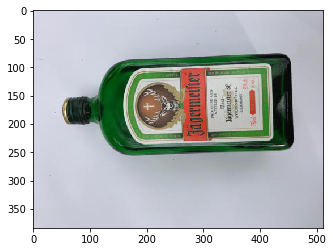

Original label:glass\glass350.jpg, Prediction :plastic, confidence : 0.698


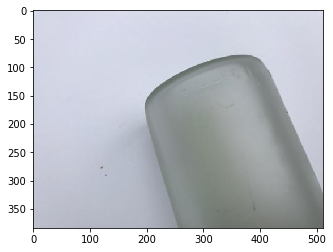

Original label:glass\glass369.jpg, Prediction :plastic, confidence : 0.439


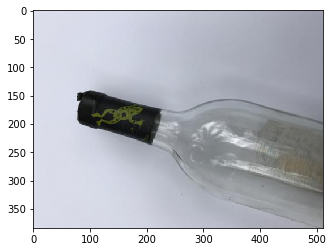

Original label:glass\glass374.jpg, Prediction :cardboard, confidence : 1.000


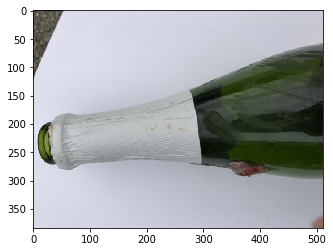

Original label:glass\glass402.jpg, Prediction :trash, confidence : 0.699


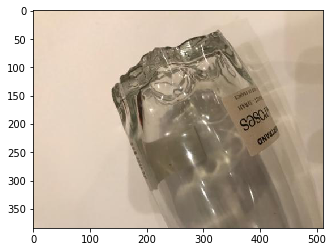

Original label:glass\glass410.jpg, Prediction :metal, confidence : 0.947


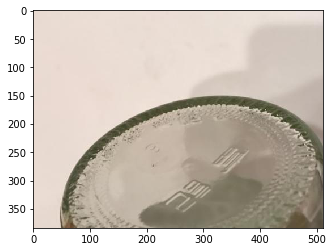

Original label:glass\glass416.jpg, Prediction :plastic, confidence : 0.409


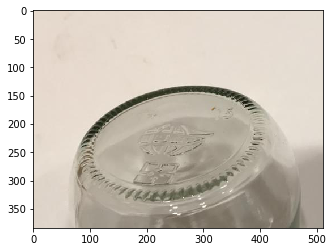

Original label:glass\glass420.jpg, Prediction :plastic, confidence : 0.501


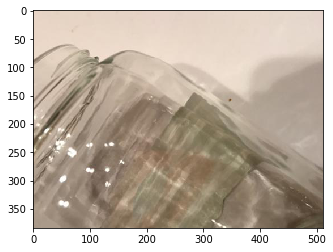

Original label:glass\glass424.jpg, Prediction :metal, confidence : 0.997


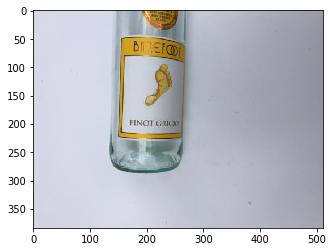

Original label:glass\glass43.jpg, Prediction :plastic, confidence : 0.988


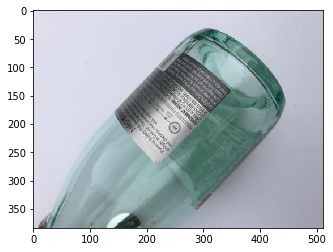

Original label:glass\glass445.jpg, Prediction :plastic, confidence : 0.929


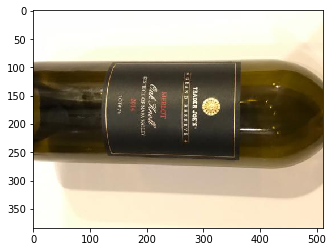

Original label:glass\glass453.jpg, Prediction :metal, confidence : 0.998


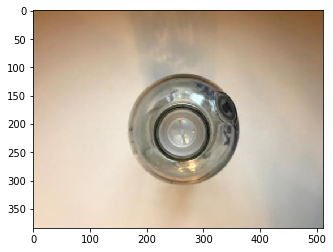

Original label:glass\glass462.jpg, Prediction :plastic, confidence : 0.996


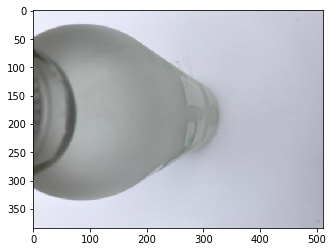

Original label:glass\glass57.jpg, Prediction :plastic, confidence : 0.779


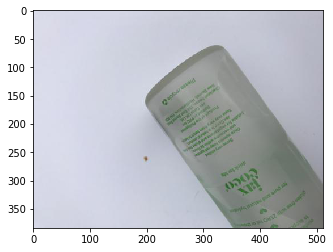

Original label:glass\glass62.jpg, Prediction :paper, confidence : 0.777


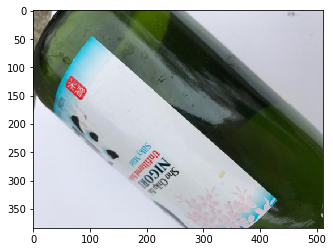

Original label:metal\metal101.jpg, Prediction :glass, confidence : 0.829


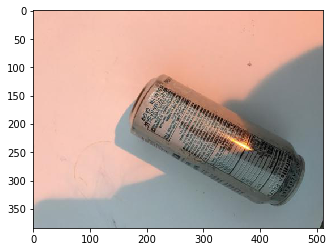

Original label:metal\metal113.jpg, Prediction :plastic, confidence : 0.553


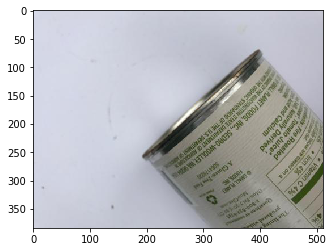

Original label:metal\metal12.jpg, Prediction :plastic, confidence : 0.429


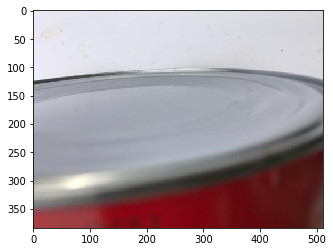

Original label:metal\metal139.jpg, Prediction :plastic, confidence : 0.801


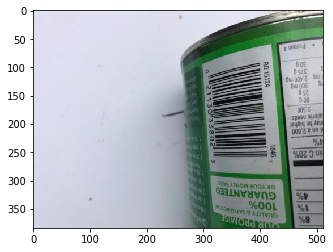

Original label:metal\metal14.jpg, Prediction :paper, confidence : 0.573


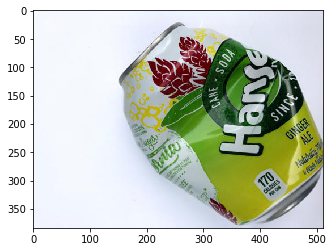

Original label:metal\metal151.jpg, Prediction :glass, confidence : 0.803


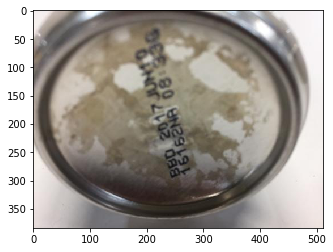

Original label:metal\metal155.jpg, Prediction :plastic, confidence : 0.570


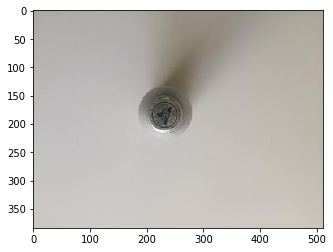

Original label:metal\metal156.jpg, Prediction :plastic, confidence : 0.516


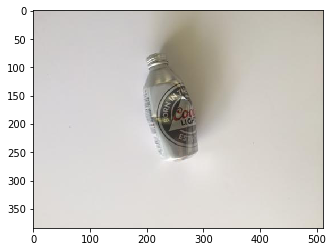

Original label:metal\metal175.jpg, Prediction :plastic, confidence : 0.975


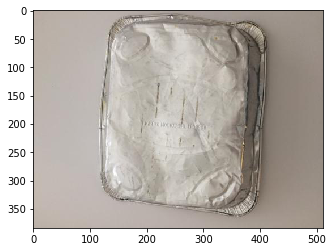

Original label:metal\metal176.jpg, Prediction :paper, confidence : 0.989


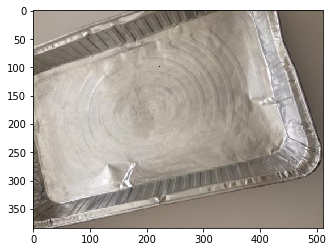

Original label:metal\metal177.jpg, Prediction :plastic, confidence : 0.809


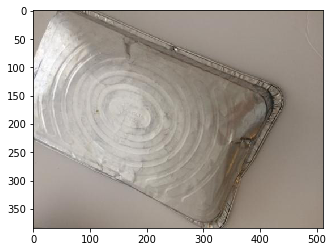

Original label:metal\metal18.jpg, Prediction :plastic, confidence : 0.830


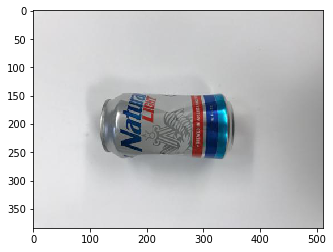

Original label:metal\metal185.jpg, Prediction :glass, confidence : 0.597


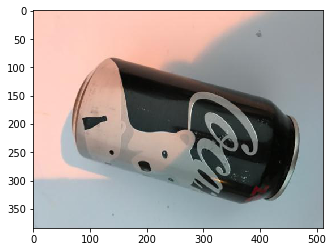

Original label:metal\metal198.jpg, Prediction :plastic, confidence : 0.684


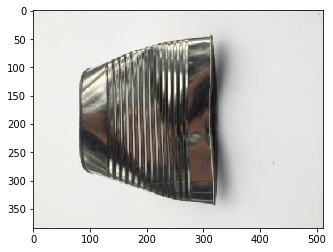

Original label:metal\metal199.jpg, Prediction :paper, confidence : 0.833


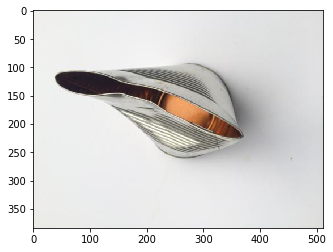

Original label:metal\metal201.jpg, Prediction :paper, confidence : 0.720


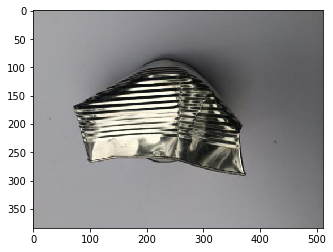

Original label:metal\metal214.jpg, Prediction :plastic, confidence : 0.509


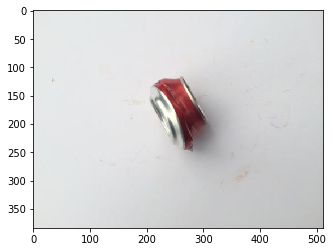

Original label:metal\metal235.jpg, Prediction :plastic, confidence : 0.947


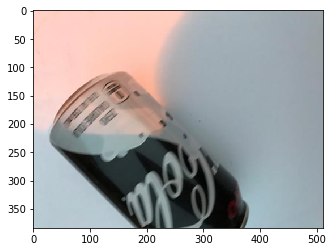

Original label:metal\metal317.jpg, Prediction :plastic, confidence : 0.456


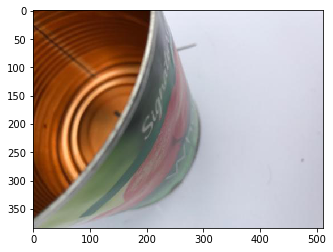

Original label:metal\metal323.jpg, Prediction :paper, confidence : 0.572


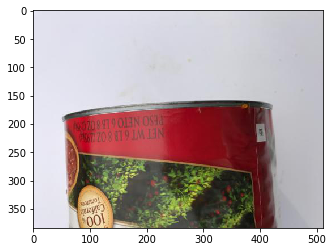

Original label:metal\metal338.jpg, Prediction :plastic, confidence : 0.918


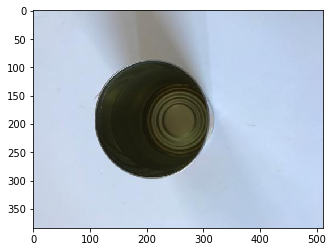

Original label:metal\metal37.jpg, Prediction :glass, confidence : 0.801


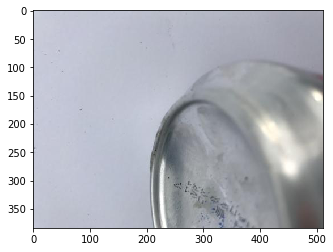

Original label:metal\metal403.jpg, Prediction :plastic, confidence : 0.947


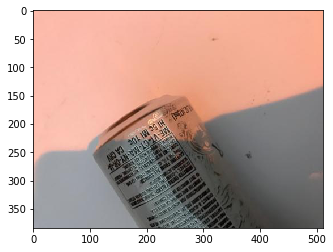

Original label:metal\metal404.jpg, Prediction :paper, confidence : 0.530


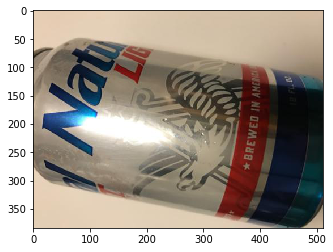

Original label:metal\metal63.jpg, Prediction :glass, confidence : 1.000


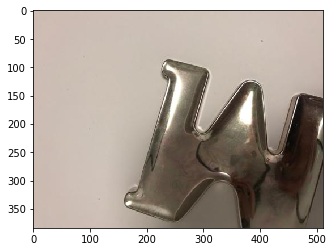

Original label:metal\metal7.jpg, Prediction :trash, confidence : 0.483


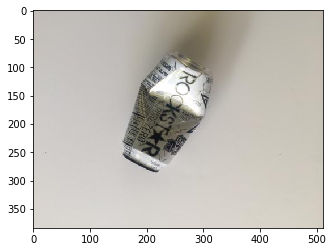

Original label:paper\paper113.jpg, Prediction :metal, confidence : 0.684


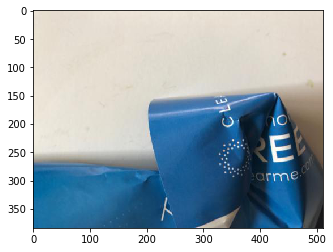

Original label:paper\paper139.jpg, Prediction :cardboard, confidence : 0.673


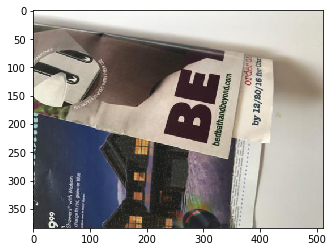

Original label:paper\paper237.jpg, Prediction :cardboard, confidence : 0.753


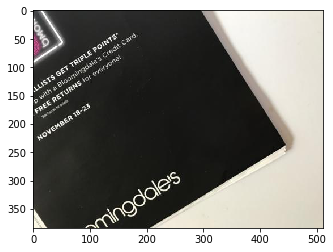

Original label:paper\paper258.jpg, Prediction :cardboard, confidence : 1.000


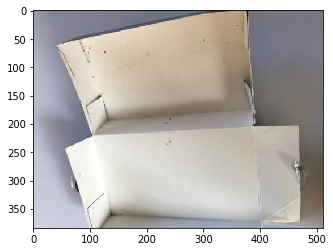

Original label:paper\paper283.jpg, Prediction :trash, confidence : 0.905


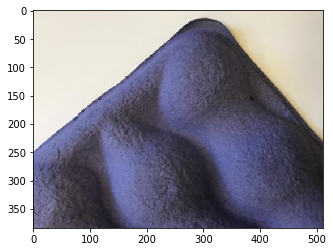

Original label:paper\paper334.jpg, Prediction :plastic, confidence : 0.695


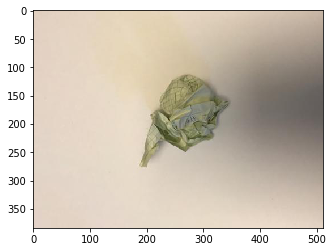

Original label:paper\paper344.jpg, Prediction :cardboard, confidence : 0.869


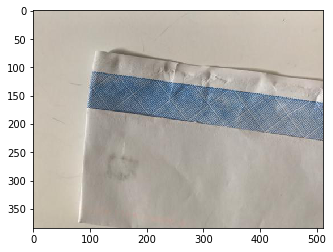

Original label:paper\paper366.jpg, Prediction :cardboard, confidence : 0.568


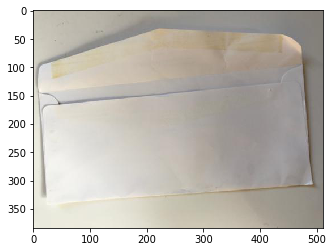

Original label:paper\paper375.jpg, Prediction :metal, confidence : 0.997


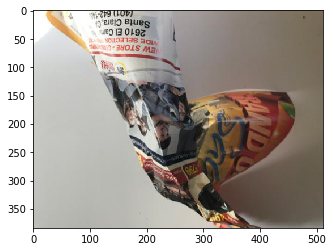

Original label:paper\paper410.jpg, Prediction :cardboard, confidence : 1.000


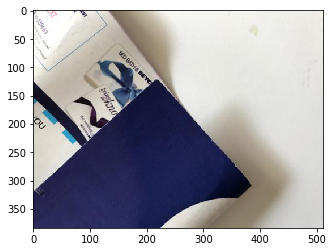

Original label:paper\paper428.jpg, Prediction :metal, confidence : 0.403


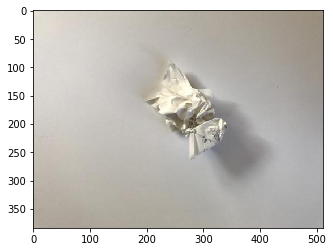

Original label:paper\paper433.jpg, Prediction :cardboard, confidence : 0.507


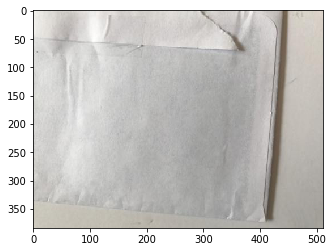

Original label:paper\paper469.jpg, Prediction :metal, confidence : 0.998


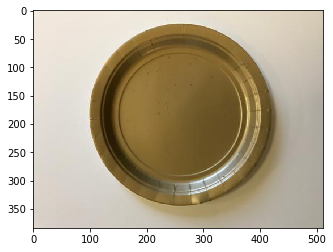

Original label:paper\paper489.jpg, Prediction :cardboard, confidence : 0.944


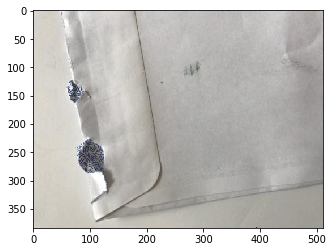

Original label:paper\paper499.jpg, Prediction :plastic, confidence : 0.519


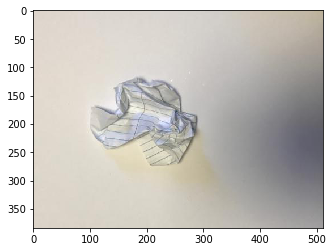

Original label:paper\paper51.jpg, Prediction :cardboard, confidence : 0.860


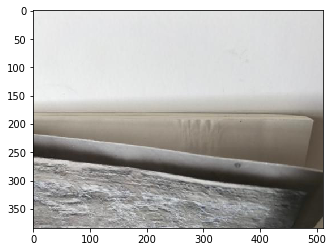

Original label:paper\paper528.jpg, Prediction :plastic, confidence : 0.931


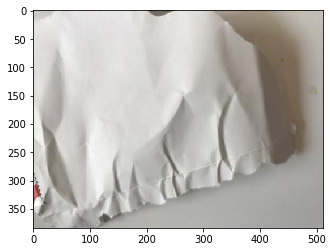

Original label:paper\paper550.jpg, Prediction :trash, confidence : 0.523


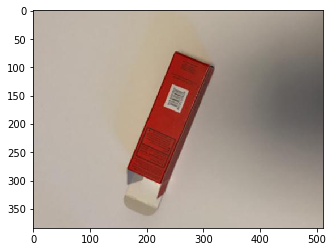

Original label:paper\paper8.jpg, Prediction :cardboard, confidence : 0.990


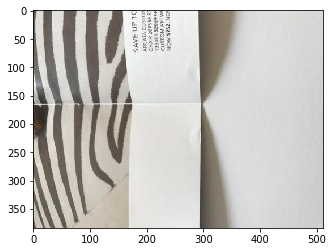

Original label:plastic\plastic101.jpg, Prediction :paper, confidence : 0.704


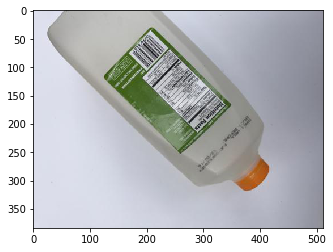

Original label:plastic\plastic133.jpg, Prediction :glass, confidence : 0.921


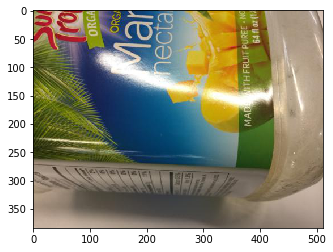

Original label:plastic\plastic199.jpg, Prediction :metal, confidence : 0.868


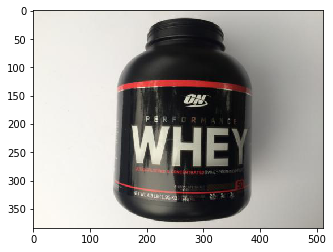

Original label:plastic\plastic356.jpg, Prediction :metal, confidence : 0.987


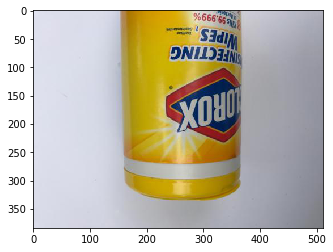

Original label:plastic\plastic361.jpg, Prediction :metal, confidence : 0.990


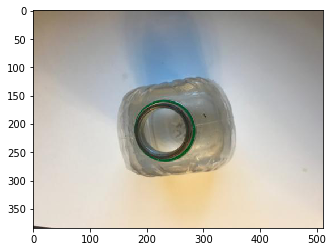

Original label:plastic\plastic368.jpg, Prediction :trash, confidence : 0.826


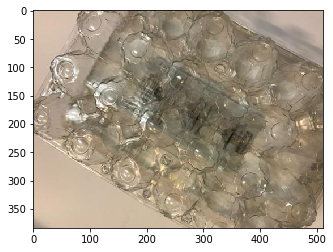

Original label:plastic\plastic40.jpg, Prediction :glass, confidence : 0.836


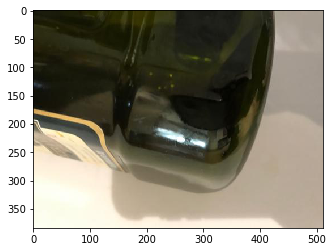

Original label:plastic\plastic430.jpg, Prediction :metal, confidence : 0.468


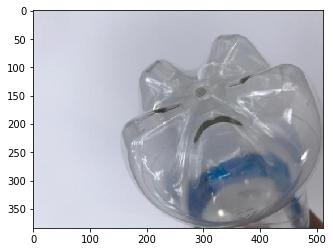

Original label:plastic\plastic454.jpg, Prediction :paper, confidence : 0.657


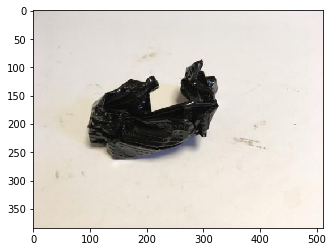

Original label:plastic\plastic460.jpg, Prediction :cardboard, confidence : 0.987


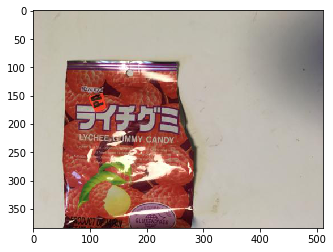

Original label:plastic\plastic465.jpg, Prediction :paper, confidence : 0.916


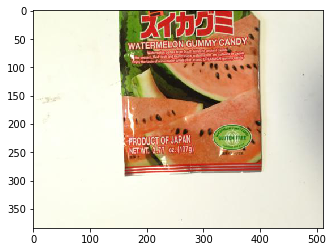

Original label:plastic\plastic74.jpg, Prediction :metal, confidence : 0.997


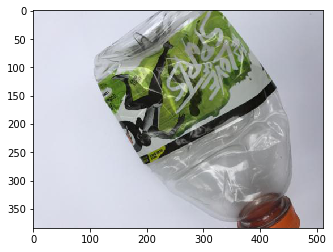

Original label:plastic\plastic86.jpg, Prediction :glass, confidence : 0.668


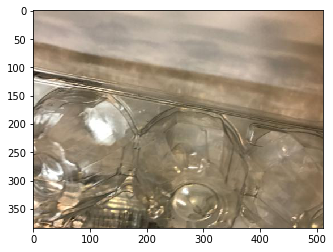

Original label:trash\trash107.jpg, Prediction :plastic, confidence : 0.816


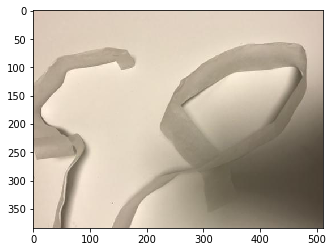

Original label:trash\trash11.jpg, Prediction :plastic, confidence : 0.947


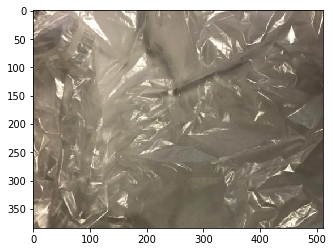

Original label:trash\trash124.jpg, Prediction :paper, confidence : 1.000


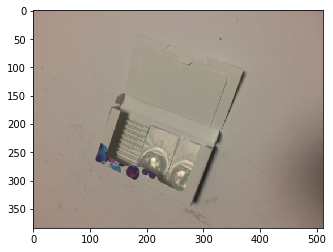

Original label:trash\trash129.jpg, Prediction :glass, confidence : 0.994


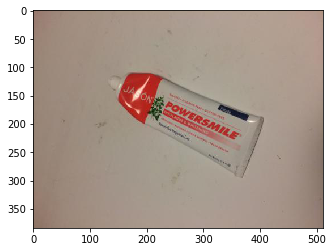

Original label:trash\trash133.jpg, Prediction :plastic, confidence : 0.749


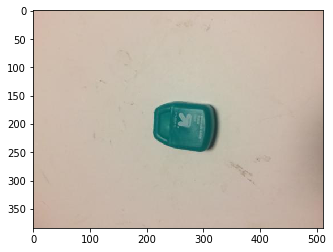

Original label:trash\trash134.jpg, Prediction :glass, confidence : 0.889


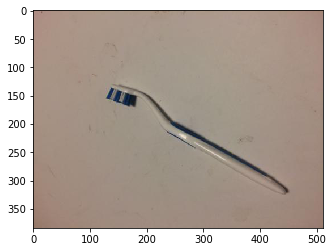

Original label:trash\trash2.jpg, Prediction :plastic, confidence : 0.606


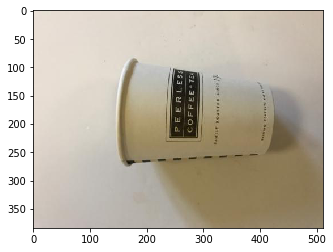

Original label:trash\trash25.jpg, Prediction :plastic, confidence : 0.995


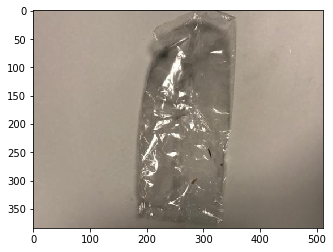

Original label:trash\trash57.jpg, Prediction :plastic, confidence : 0.680


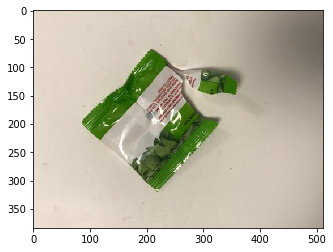

Original label:trash\trash68.jpg, Prediction :plastic, confidence : 0.946


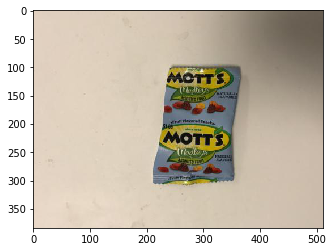

Original label:trash\trash72.jpg, Prediction :plastic, confidence : 0.998


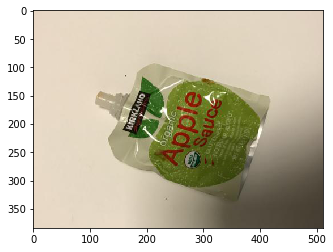

Original label:trash\trash87.jpg, Prediction :plastic, confidence : 0.507


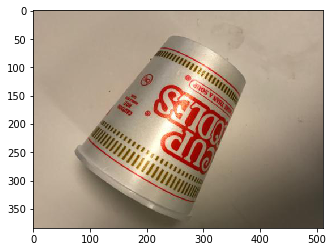

Original label:trash\trash89.jpg, Prediction :paper, confidence : 0.991


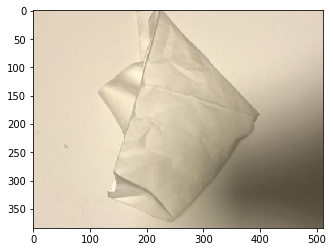

In [20]:
from keras.preprocessing.image import load_img
for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
    
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        prob[errors[i]][pred_class]))
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.imshow(original)
    plt.show()